# In this notebook:
## We explore the imputation techniques we used for Null Values and also it's effect on the statistical properties of the respective city data

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r"I:\My Drive\Data Science\Sri Vipra\Code\Cities Seperated\Delhi_data.csv")

In [10]:
df = df.drop(columns=['AQI_Bucket','City'])
df= df.interpolate(method='linear')
#If necessary we use backfill also with linear interpolation
#df = df.bfill()

C:\Users\malli\AppData\Local\Temp\ipykernel_14956\214916518.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df= df.interpolate(method='linear')


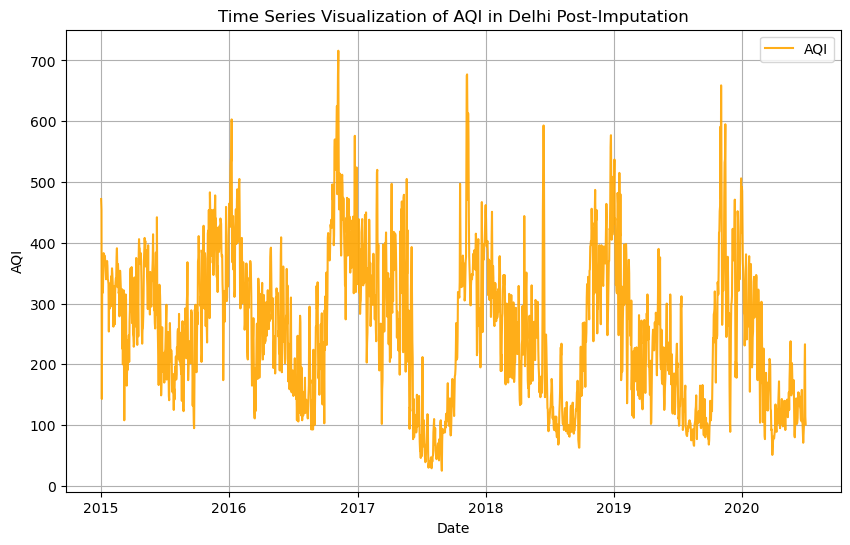

In [11]:
# Convert the 'Date' column to datetime for better time series handling
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting the AQI values over time to visualize the time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='orange', alpha = 0.9)
plt.title('Time Series Visualization of AQI in Delhi Post-Imputation')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2007 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2007 non-null   float64
 1   PM10    2007 non-null   float64
 2   NOx     2007 non-null   float64
 3   NH3     2007 non-null   float64
 4   CO      2007 non-null   float64
 5   SO2     2007 non-null   float64
 6   O3      2007 non-null   float64
 7   AQI     2007 non-null   float64
dtypes: float64(8)
memory usage: 141.1 KB


In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
PM2.5,PM2.5,0.0
PM10,PM10,0.0
NOx,NOx,0.0
NH3,NH3,0.0
CO,CO,0.0
SO2,SO2,0.0
O3,O3,0.0
AQI,AQI,0.0


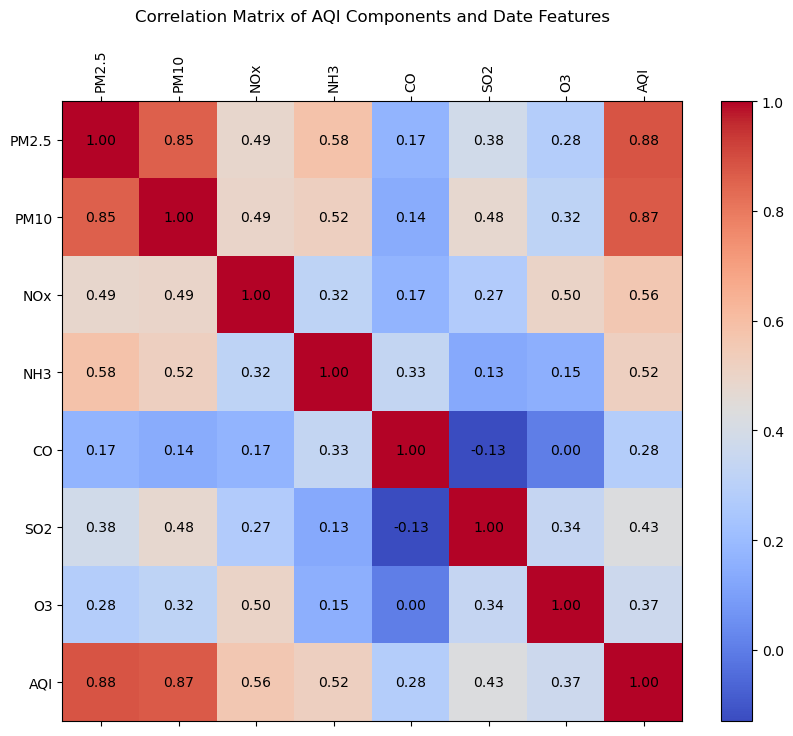

In [14]:
# Creating datetime features such as month, day of the week, and year
df['Month'] = df.index.month
df['Day_of_Week'] = df.index.dayofweek
df['Year'] = df.index.year

# Selecting AQI components and datetime features for correlation
correlation_data = df[['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']]

# Calculating correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix with values displayed in each cell
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)

# Adding correlation values on top of the heatmap cells
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Adding labels and title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of AQI Components and Date Features', pad=20)
plt.show()
